In [82]:
import pickle
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import math

from sklearn.model_selection import GridSearchCV

# Load param artefacts

In [85]:
def load_pickle_object(name):
    path = os.path.join("..", "artefacts", name)
    with open(path, 'rb') as f:
        loaded_object = pickle.load(f)
    return loaded_object


greeks_lgbm_grid = load_pickle_object("greeks_LGBMClassifier_tuned_grid.pkl")
# no_greeks_lgbm_grid = load_pickle_object("no_greeks_LGBMClassifier_tuned_grid.pkl")

In [11]:
type(greeks_lgbm_grid)

sklearn.model_selection._search.GridSearchCV

In [15]:
greeks_lgbm_grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('columntransformer',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('standardscaler',
                                                                                          StandardScaler(),
                                                                                          ['CW ']),
                                                                                         ('pipeline-1',
                                                                                          Pipeline(steps=[('functiontransformer',
                                                                                                           FunctionTransformer(feature_names_out='one-to-one',
              

In [26]:
greeks_lgbm_grid.param_grid

{'LGBMClassifier__boosting_type': ['gbdt', 'dart'],
 'LGBMClassifier__n_estimators': [20, 50, 100, 150, 200, 250, 300, 350, 400],
 'LGBMClassifier__reg_alpha': [0, 0.001, 0.01, 0.1],
 'LGBMClassifier__reg_lambda': [0, 0.001, 0.01, 0.1]}

In [16]:
greeks_lgbm_grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_LGBMClassifier__boosting_type', 'param_LGBMClassifier__n_estimators', 'param_LGBMClassifier__reg_alpha', 'param_LGBMClassifier__reg_lambda', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [49]:
import pandas as pd

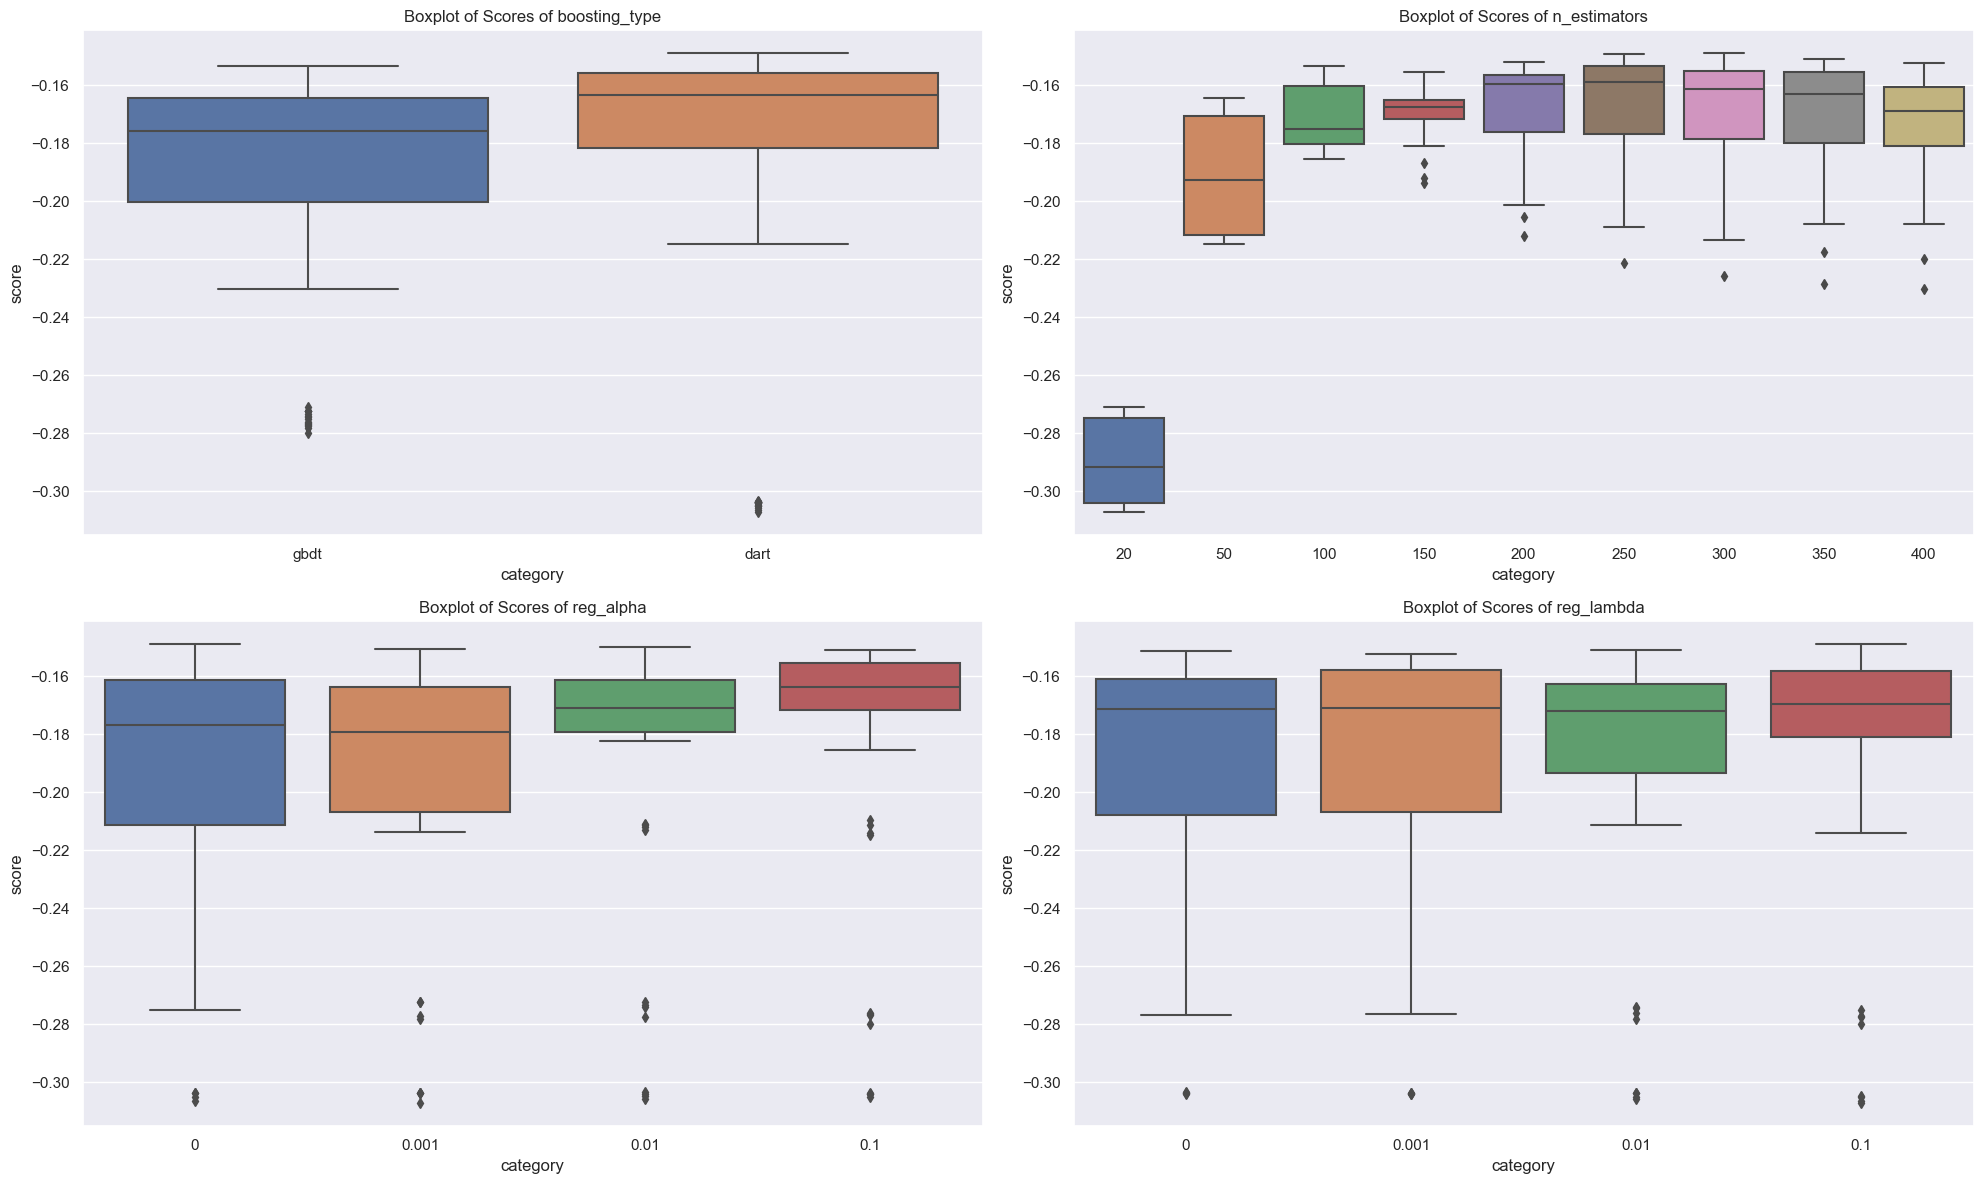

In [83]:
def get_param_and_values(grid, original_param):
    param = original_param
    pg = grid.param_grid
    classifier_name = None

    for k in pg.keys():
        if "__" in k:
            classifier_name = k.split("_")[0]
            break
            
    if classifier_name:
        param = f"{classifier_name}__{original_param}"
    
    param_with_prefix = f"param_{param}"
    param_value_for_result = grid.cv_results_[param_with_prefix].data
    result = grid.cv_results_["mean_test_score"]
    
    return param_value_for_result, result

def visualize_categorical(scores, categories, param_name, ax):
    df = pd.DataFrame({'score': scores, 'category': categories})
    sns.boxplot(x='category', y='score', data=df, ax=ax)
    ax.set_title(f"Boxplot of Scores of {param_name}")

def plot_param(grid, param, ax):
    param_values, scores = get_param_and_values(grid, param)
    visualize_categorical(scores, param_values, param, ax)

def plot_all(grid, parameters):
    # Calculate the grid size: square root of the number of parameters
    grid_size = math.ceil(math.sqrt(len(parameters)))

    # Prepare the subplots
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(20, 12))
    axes = axes.flatten()  # Flatten the grid to a 1D array

    # Here greeks_lgbm_grid should be your grid object
    for i, param in enumerate(parameters):
        plot_param(grid, param, axes[i])

    # Remove the unused subplots
    for j in range(i+1, grid_size*grid_size):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

params = ["boosting_type", "n_estimators", "reg_alpha", "reg_lambda"]
plot_all(greeks_lgbm_grid, params)
plot_all(greeks_lgbm_grid, params)

In [ ]:
param_values, scores = get_param_and_values(greeks_lgbm_grid, "boosting_type")
visualize_categorical(scores, param_values, "boosting_type")